In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
import sklearn

In [ ]:
#create matrix
community = np.zeros((80,80),dtype='float')
friend = np.zeros((80,80),dtype='float')

In [ ]:
#insert data into matrix
fichier_community = open("/content/drive/MyDrive/PCD/community.txt", "r")
fichier_friend = open("/content/drive/MyDrive/PCD/friend.txt", "r")
lines_community = fichier_community.readlines()
lines_friend = fichier_friend.readlines()
fichier_community.close()

for line in lines_community:
  line=line.replace('\n', '')
  l = list(line.split(" "))
  community[(int(l[0])-1)][(int(l[1])-1)]=float(l[2])
  community[(int(l[1])-1)][(int(l[0])-1)]=float(l[2]) 
for line in lines_friend:
  line=line.replace('\n', '')
  l = list(line.split(" "))
  friend[(int(l[0])-1)][(int(l[1])-1)]=float(l[2])
  friend[(int(l[1])-1)][(int(l[0])-1)]=float(l[2])  

In [ ]:
#find the positions of null lines 
f=friend
l2=[]
k=0
for i in range(len(f)):
  for j in range(len(f)):
    if(f[i][j]==0):
      k+=1
  if(k==len(f)):
    l2.append(i)
  k=0 

In [ ]:
print(l2)

In [ ]:
#removal of null lines 
for i in range(len(l2)):
  friend=(np.delete(friend, (l2[i]-i), axis=0))
  friend=(np.delete(friend, (l2[i]-i), axis=1))

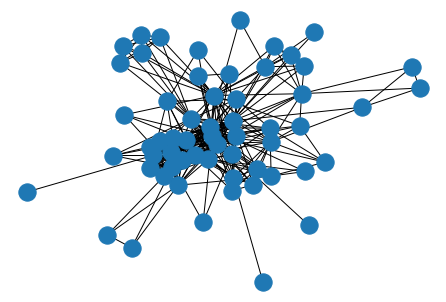

In [ ]:
#graph 
g_x= nx.DiGraph(friend)
w_friend=g_x.to_undirected()
nx.draw(w_friend)
plt.show()

In [ ]:
#find the positions of null lines 
f=community
l2=[]
k=0
for i in range(len(f)):
  for j in range(len(f)):
    if(f[i][j]==0):
      k+=1
  if(k==len(f)):
    l2.append(i)
  k=0 

In [ ]:
print(l2)

In [ ]:
#removal of null lines 
for i in range(len(l2)):
  community=(np.delete(community, (l2[i]-i), axis=0))
  community=(np.delete(community, (l2[i]-i), axis=1))

In [ ]:
#deletion of the other non-zero lines to arrive at a dimension 59 * 59 
for i in range(6):
  community=(np.delete(community, (0), axis=0))
  community=(np.delete(community, (0), axis=1))

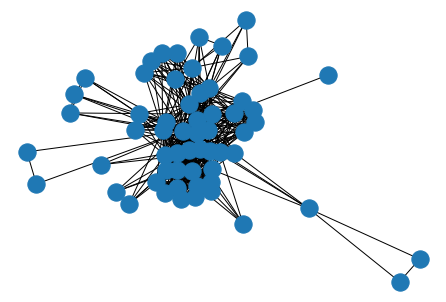

In [ ]:
#graph
g_x= nx.DiGraph(community)
w_community=g_x.to_undirected()
nx.draw(w_community)
plt.show()

In [ ]:
#find i_leaders
B_community=np.sum(community,axis=0)
l_community=B_community.tolist()
B_friend=np.sum(friend,axis=0)
l_friend=B_friend.tolist()
i_leader_community=l_community.index(max(l_community))
i_leader_friend=l_friend.index(max(l_friend))

In [ ]:
#find the list that builds the contiguous matrix (data friend)
l3=list(range(59))
i_leader=i_leader_friend
A=friend
o_friend=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_friend.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  #print(time.time()-t2)
o_friend.append(i_leader)  
print(l3)
print(len(o_friend)) 
print(o_friend) 

43
[]
59
[43, 2, 16, 10, 11, 6, 57, 5, 17, 4, 19, 18, 29, 49, 27, 45, 46, 21, 52, 47, 9, 39, 55, 58, 25, 30, 42, 20, 24, 35, 54, 0, 36, 41, 33, 7, 12, 22, 26, 31, 23, 48, 40, 50, 56, 13, 1, 44, 38, 28, 37, 14, 51, 32, 15, 34, 53, 8, 3]


In [ ]:
#find the list that builds the contiguous matrix (data community)
l3=list(range(59))
i_leader=i_leader_community
A=community
o_community=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_community.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  #print(time.time()-t2)
o_community.append(i_leader)  
print(l3)
print(len(o_community)) 
print(o_community) 

40
[]
59
[40, 29, 26, 24, 3, 11, 15, 20, 51, 27, 34, 50, 21, 14, 25, 42, 47, 56, 28, 53, 35, 19, 30, 31, 38, 13, 52, 49, 55, 48, 33, 45, 43, 18, 9, 6, 8, 44, 36, 54, 32, 22, 5, 10, 23, 39, 0, 58, 46, 57, 1, 2, 37, 16, 7, 17, 41, 4, 12]


In [ ]:
#modified matrices
C_community = np.zeros((59,59),dtype='float')
C_friend = np.zeros((59,59),dtype='float')
for i in range(59):
  for j in range(59):
    C_community[i][j]=community[o_community[i]][o_community[j]]
    C_friend[i][j]=friend[o_friend[i]][o_friend[j]]

In [ ]:
#dataframe
df_community = pd.DataFrame(C_community)
df_friend = pd.DataFrame(C_friend)

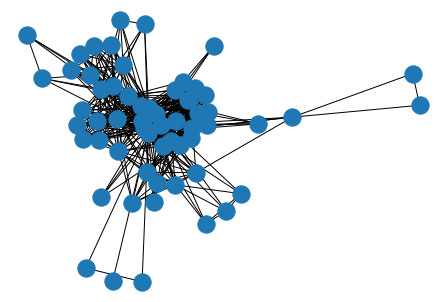

In [ ]:
#relation graph
g_x= nx.DiGraph(C_community)
w_C_community=g_x.to_undirected()
nx.draw(w_C_community)
plt.show()

In [ ]:
#spectral community
import sklearn
spectral = SpectralClustering(n_clusters=15,affinity='precomputed')
spectral.fit(C_community)
labels_community = spectral.labels_
#metrics
silhouette_avg = silhouette_score(C_community, labels_community)
Davies_M= sklearn.metrics.davies_bouldin_score(C_community, labels_community)
Calinski_Harabaz=metrics.calinski_harabasz_score(C_community, labels_community)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

2.167781787870269
1.2600053660250243
0.008881759791228624


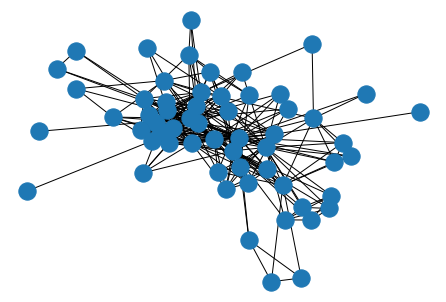

In [ ]:
#relation graph 
g_x= nx.DiGraph(C_friend)
w_C_friend=g_x.to_undirected()
nx.draw(w_C_friend)
plt.show()

In [ ]:
#spectral friend
import sklearn
spectral = SpectralClustering(n_clusters=8,affinity='precomputed')
spectral.fit(C_friend)
labels_friend = spectral.labels_
#metrics
silhouette_avg = silhouette_score(C_friend, labels_friend)
Davies_M= sklearn.metrics.davies_bouldin_score(C_friend, labels_friend)
Calinski_Harabaz=metrics.calinski_harabasz_score(C_friend, labels_friend)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

3.3669581750431705
1.7894053603477391
0.020180869806245224


In [ ]:
#relation matrix created by two matrix friend and community
M = np.zeros((59,59),dtype='float')
k=0
for i in range(58):
  for j in range(i+1,59):
    if(labels_friend[i]==labels_friend[j]):
      k+=1
    if(labels_community[i]==labels_community[j]):
      k+=1          
    M[i][j]=k
    M[j][i]=k
    k=0

In [ ]:
#find i_leader
B_M=np.sum(M,axis=0)
l_M=B_M.tolist()
i_leader_M=l_M.index(max(l_M))

In [ ]:
#find the list that builds the contiguous matrix 
l3=list(range(59))
i_leader=i_leader_M
A=M
o_M=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_M.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  #print(time.time()-t2)
o_M.append(i_leader)  
#print(l3)
print(len(o_M)) 
print(o_M) 

1
59
[1, 2, 3, 4, 5, 6, 11, 19, 55, 57, 58, 29, 48, 49, 47, 16, 50, 52, 45, 53, 54, 28, 51, 56, 21, 22, 23, 24, 25, 26, 27, 17, 12, 32, 33, 34, 30, 46, 31, 38, 35, 39, 36, 37, 40, 14, 41, 42, 43, 44, 0, 13, 15, 18, 7, 8, 20, 9, 10]


In [ ]:
#modified M matrix 
C_M = np.zeros((59,59),dtype='float')
for i in range(59):
  for j in range(59):
    C_M[i][j]=M[o_M[i]][o_M[j]]
   

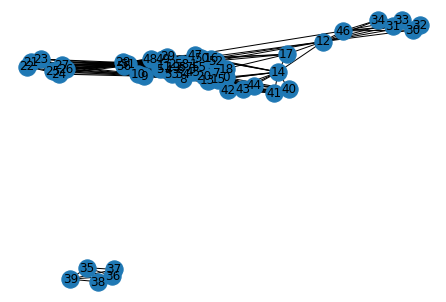

In [ ]:
#relation graph
g_x= nx.DiGraph(M)
w_C_M=g_x.to_undirected()
nx.draw(w_C_M,with_labels=True)
plt.show()

In [ ]:
C_M[40][47]=1
C_M[47][40]=1

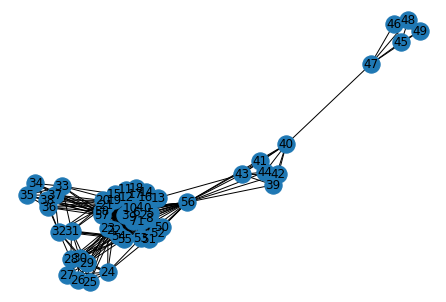

In [ ]:
#graph
g_x= nx.DiGraph(C_M)
w_C_M=g_x.to_undirected()
nx.draw(w_C_M,with_labels=True)
plt.show()

In [ ]:
#spectral clustering
spectral = SpectralClustering(n_clusters=7,affinity='precomputed')
spectral.fit(C_M)
labels = spectral.labels_
#metrics
silhouette_avg = silhouette_score(C_M, labels)
Davies_M= sklearn.metrics.davies_bouldin_score(C_M, labels)
Calinski_Harabaz=metrics.calinski_harabasz_score(C_M, labels)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

18.52711907459847
1.1098340994504088
0.3136069079435984


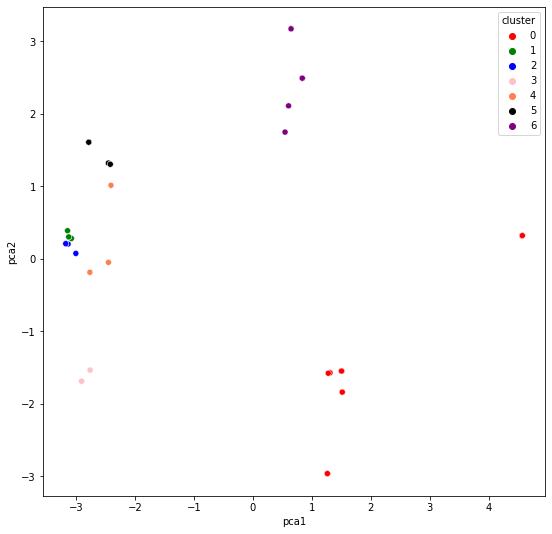

In [ ]:
#show data
pca = PCA(n_components = 2)
principal_comp_M = pca.fit_transform(C_M)
pca_df_M = pd.DataFrame(data = principal_comp_M, columns = ['pca1', 'pca2'])
pca_df_M = pd.concat([pca_df_M, pd.DataFrame({'cluster': labels})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df_M, palette = ['red','green','blue','pink','coral','black','purple'])


In [ ]:
print(principal_comp_M)